In [5]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, applications

# Kategorie gatunków muzycznych
categories = ['disco', 'electro', 'folk', 'rap', 'rock']

def load_images_and_labels(categories):
    img_lst = []
    labels = []

    # Przechodzenie przez kategorie i obrazy w każdej kategorii
    for index, category in enumerate(categories):
        for image_name in os.listdir(fr'/content/drive/MyDrive/Dane do projektu DL The Chaos Makers /Projekt DL/Nowy folder/images labeled/images labeled/{category}'):
            # Wczytywanie obrazu i zmiana rozmiaru na 224x224 piksele
            img = cv2.imread(fr'/content/drive/MyDrive/Dane do projektu DL The Chaos Makers /Projekt DL/Nowy folder/images labeled/images labeled/{category}/{image_name}')
            img_array = cv2.resize(img, (224, 224))
            img_lst.append(img_array)
            labels.append(index)

    return img_lst, labels

img_lst, labels = load_images_and_labels(categories)
print(len(img_lst))
print(len(labels))

# Konwersja list na numpy arrays
img_lst = np.array(img_lst)
labels = np.array(labels)

# Podział na zbiór treningowy i testowy
x_train, x_test, y_train, y_test = train_test_split(img_lst, labels, test_size=0.1, random_state=42)

# Normalizacja wartości pikseli do zakresu od 0 do 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Konwersja typu danych na float32
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

print(f'Ilość zdjęć dla zbioru treningowego: {x_train.shape[0]}')
print(f'Ilość zdjęć dla zbioru testowego: {x_test.shape[0]}')

# Transformacja etykiet na one-hot encoding
y_train = tf.one_hot(y_train, depth=len(categories))
y_test = tf.one_hot(y_test, depth=len(categories))

print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

# Wczytanie wstępnie wytrenowanego modelu VGG16
base_model = applications.VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))


2196
2196
Ilość zdjęć dla zbioru treningowego: 1976
Ilość zdjęć dla zbioru testowego: 220
y_train.shape: (1976, 5)
y_test.shape: (220, 5)
58889256/58889256 [==============================] - 4s 0us/step


In [7]:

# Zamrożenie wag warstw konwolucyjnych
for layer in base_model.layers:
    layer.trainable = False

# Tworzenie modelu
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Wyświetlenie podsumowania modelu
model.summary()

# Trenowanie modelu
history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 25088)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                1605696   
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 16,320,709
Trainable params: 1,606,021
Non-trainable params: 14,714,688
_________________________________________________________________
Epoch 1/10
62/62 [==============================] - 23s 279ms/step - loss: 0.6391 - accuracy: 0.8036 - val_loss: 0.4146 - val_accuracy: 0.8318
Epoch 2/10
62/62 [=====

In [8]:
# Ewaluacja modelu na zbiorze testowym
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

7/7 - 1s - loss: 0.5079 - accuracy: 0.8545 - 923ms/epoch - 132ms/step
Test Loss: 0.5079020857810974
Test Accuracy: 0.8545454740524292


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_4 (Dense)             (None, 64)                1605696   
                                                                 
 dense_5 (Dense)             (None, 5)                 325       
                                                                 
Total params: 16,320,709
Trainable params: 1,606,021
Non-trainable params: 14,714,688
_________________________________________________________________


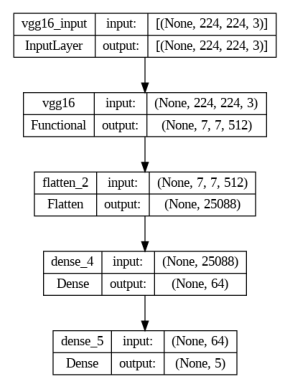

In [9]:
from tensorflow.keras.utils import plot_model

# ...

# Tworzenie modelu
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(categories), activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Wyświetlenie podsumowania modelu
model.summary()

# Zapisanie graficznej reprezentacji modelu do pliku
plot_model(model, to_file='model.png', show_shapes=True)

# Wyświetlenie graficznej reprezentacji modelu
plt.imshow(plt.imread('model.png'))
plt.axis('off')
plt.show()

In [11]:
from sklearn.metrics import classification_report


In [12]:
# Generowanie predykcji dla zbioru testowego
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)  # Konwersja predykcji z postaci one-hot encoding

# Konwersja rzeczywistych etykiet z postaci one-hot encoding
y_true = np.argmax(y_test, axis=1)

# Generowanie classification report
report = classification_report(y_true, y_pred, target_names=categories)

print(report)

7/7 [==============================] - 1s 128ms/step
              precision    recall  f1-score   support

       disco       0.75      0.45      0.56       178
     electro       0.15      0.19      0.17        42
        folk       0.00      0.00      0.00         0
         rap       0.00      0.00      0.00         0
        rock       0.00      0.00      0.00         0

    accuracy                           0.40       220
   macro avg       0.18      0.13      0.15       220
weighted avg       0.63      0.40      0.49       220



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


['disco', 'electro', 'folk', 'rap', 'rock']
5
Found 2196 files belonging to 5 classes.
Using 1977 files for training.
Found 2196 files belonging to 5 classes.
Using 219 files for validation.


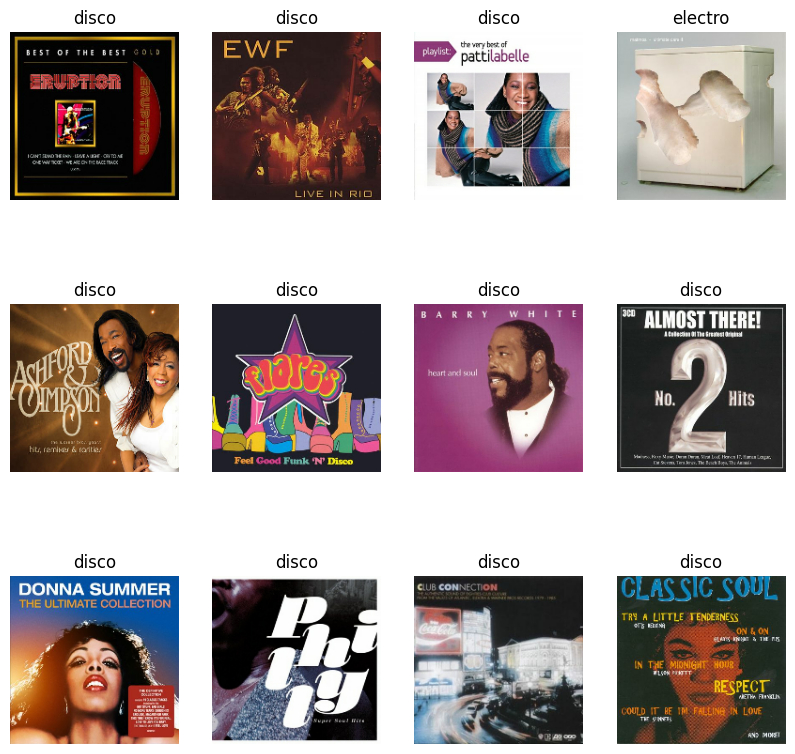

In [17]:
#Wizualizacje

batch_size = 32
img_height = 180
img_width = 180

data_dir='/content/drive/MyDrive/Dane do projektu DL The Chaos Makers /Projekt DL/Nowy folder/images labeled/images labeled' # path to the folders with data on my Google Drive

class_names = train_ds.class_names # in this method labels are generated from the directory structure
print(class_names)
print(len(class_names))
train_ds= tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [18]:
#Augmentacja
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Tworzenie obiektu ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,  # zakres losowych obracania obrazów
    width_shift_range=0.1,  # zakres losowego przesunięcia szerokości
    height_shift_range=0.1,  # zakres losowego przesunięcia wysokości
    shear_range=0.2,  # zakres zniekształcenia poziomego
    zoom_range=0.2,  # zakres losowego przybliżenia
    horizontal_flip=True,  # losowe odbicie lustrzane poziome
    fill_mode='nearest'  # tryb wypełnienia pikseli przy przesunięciach
)

# Dopasowanie generatora danych treningowych do zbioru treningowego
datagen.fit(x_train)

# Trenowanie modelu z augmentacją danych
history = model.fit(datagen.flow(x_train, y_train, batch_size=32), epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
62/62 [==============================] - 29s 452ms/step - loss: 0.7252 - accuracy: 0.7819 - val_loss: 0.3981 - val_accuracy: 0.8500
Epoch 2/10
62/62 [==============================] - 26s 422ms/step - loss: 0.3671 - accuracy: 0.8527 - val_loss: 0.5087 - val_accuracy: 0.8318
Epoch 3/10
62/62 [==============================] - 26s 414ms/step - loss: 0.3345 - accuracy: 0.8623 - val_loss: 0.3966 - val_accuracy: 0.8409
Epoch 4/10
62/62 [==============================] - 28s 456ms/step - loss: 0.2983 - accuracy: 0.8790 - val_loss: 0.4827 - val_accuracy: 0.8227
Epoch 5/10
62/62 [==============================] - 26s 424ms/step - loss: 0.3139 - accuracy: 0.8811 - val_loss: 0.5058 - val_accuracy: 0.8591
Epoch 6/10
62/62 [==============================] - 26s 425ms/step - loss: 0.2674 - accuracy: 0.8907 - val_loss: 0.4727 - val_accuracy: 0.8727
Epoch 7/10
62/62 [==============================] - 26s 421ms/step - loss: 0.2831 - accuracy: 0.8897 - val_loss: 0.4885 - val_accuracy: 0.8273

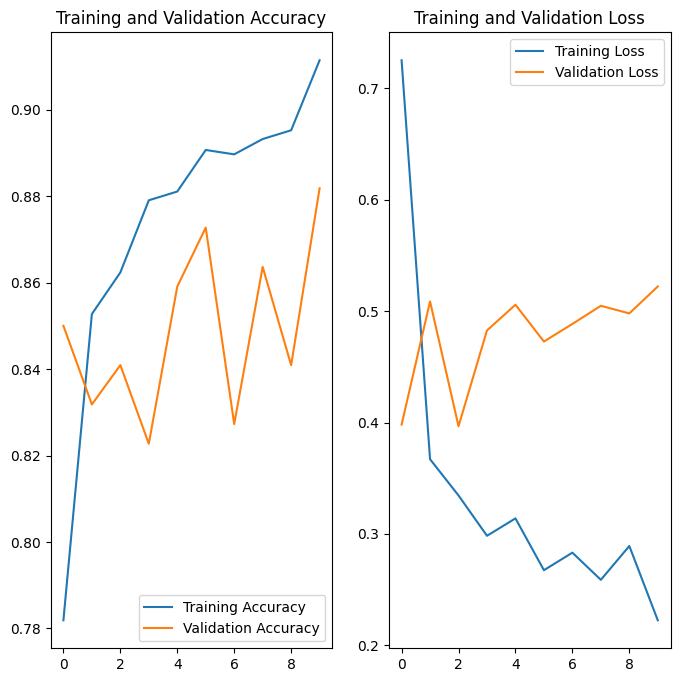

In [20]:
#wyniki
epochs = 10

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()